<a href="https://colab.research.google.com/github/dgaeck/DataMining/blob/main/dmp_data_viz_worked_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Visualization - Worked Example

We will used the following dataset (churn.xlsx):

A telephone company is interested in determining which customer characteristics are useful for predicting churn, customers who will leave their service.  The fileds are listed below


- State: 	 discrete.
- Account Length: continuous.
- Area Code: 	discrete
- Phone	phone number: discrete.
- International plan (yes / no):	 discrete.
- VMail Plan	voice mail plan (yes / no):	 discrete.
- VMail Message	number vmail messages: continuous.
- total day minutes:	 continuous.
- total day calls:	 continuous.
- total day charge:	 continuous.
- total eve minutes:	 continuous.
- total eve calls:	 continuous.
- total eve charge:	 continuous.
- total night minutes:	 continuous.
- total night calls:	 continuous.
- total night charge:	 continuous.
- total intl minutes:	 continuous.
- total intl calls:	 continuous.
- total intl charge:	 continuous.
- number customer service calls:	 continuous.
- Churn	(true/false):	 discrete


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline




## Load data

In [ ]:
df = pd.read_excel('https://foxweb.marist.edu/users/jf4n/DATA_FILES/Churn.xlsx', sheet_name='Data')
df.head()

,State,AccountLength,AreaCode,Phone,IntlPlan,VMailPlan,VMailMessage,DayMins,DayCalls,DayCharge,...,EveCalls,EveCharge,NightMins,NightCalls,NightCharge,IntlMins,IntlCalls,IntlCharge,CustServCalls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          3333 non-null   object 
 1   AccountLength  3333 non-null   int64  
 2   AreaCode       3333 non-null   int64  
 3   Phone          3333 non-null   object 
 4   IntlPlan       3333 non-null   object 
 5   VMailPlan      3333 non-null   object 
 6   VMailMessage   3333 non-null   int64  
 7   DayMins        3333 non-null   float64
 8   DayCalls       3333 non-null   int64  
 9   DayCharge      3333 non-null   float64
 10  EveMins        3333 non-null   float64
 11  EveCalls       3333 non-null   int64  
 12  EveCharge      3333 non-null   float64
 13  NightMins      3333 non-null   float64
 14  NightCalls     3333 non-null   int64  
 15  NightCharge    3333 non-null   float64
 16  IntlMins       3333 non-null   float64
 17  IntlCalls      3333 non-null   int64  
 18  IntlChar

## Explore Categorical Variables

### International Plan
Figure below shows proportion of customers in International Plan with churn overlay
International Plan: yes = 9.69%, no = 90.31%
Possibly, greater proportion of those in International Plan are churners?

In [ ]:
count_df = df.groupby(['IntlPlan','Churn']).size().unstack()
count_df

Churn,False,True
IntlPlan,,
no,2664,346
yes,186,137


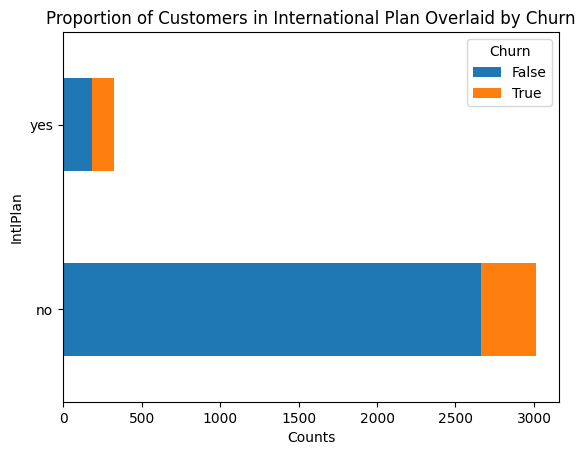

In [ ]:
count_df.plot(kind='barh', stacked=True)

plt.title('Proportion of Customers in International Plan Overlaid by Churn')
plt.xlabel('Counts')
plt.ylabel('IntlPlan')
plt.legend(title='Churn')

plt.show()

In [ ]:
# Normalize the counts to get proportions
count_df_normalized = count_df.div(count_df.sum(axis=1), axis=0)
count_df_normalized*100

Churn,False,True
IntlPlan,,
no,88.504983,11.495017
yes,57.585139,42.414861


Customers selecting International Plan 3+ times more likely to leave company, as compared to those not in plan.

Why does International Plan apparently cause customers to leave?

Data models predicting churn will likely include International Plan as predictor

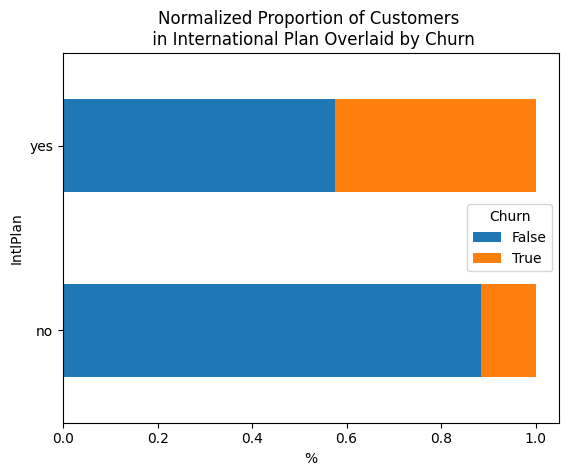

In [ ]:
count_df_normalized.plot(kind='barh', stacked=True)

plt.title('Normalized Proportion of Customers \n in International Plan Overlaid by Churn')
plt.xlabel('%')
plt.ylabel('IntlPlan')
plt.legend(title='Churn')

plt.show()

##Similarly, with Voice Mail Plan:

In [ ]:
count_df = df.groupby(['VMailPlan','Churn']).size().unstack()

# Normalize the counts to get proportions
count_df_normalized = count_df.div(count_df.sum(axis=1), axis=0)
count_df_normalized*100

Churn,False,True
VMailPlan,,
no,83.284944,16.715056
yes,91.323210,8.676790


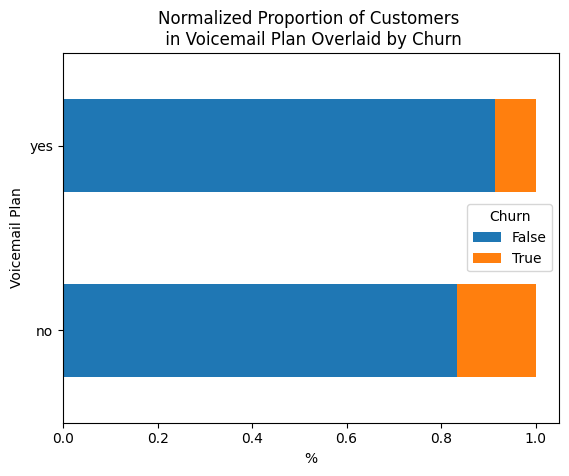

In [ ]:
count_df_normalized.plot(kind='barh', stacked=True)

plt.title('Normalized Proportion of Customers \n in Voicemail Plan Overlaid by Churn')
plt.xlabel('%')
plt.ylabel('Voicemail Plan')
plt.legend(title='Churn')

plt.show()

Only 8.67%  of those in plan are churners.<br>
Of those not in plan, 16.71% are churners.<br>
Therefore, those not participating in plan twice as likely to churn, as compared to those in plan.<br>
Perhaps customer loyalty can be increased by simplifying enrollment into Voice Mail Plan?<br>
Data models predicting churn likely to include Voice Mail Plan as predictor.

In [ ]:
df[df['Churn']==True]

,State,AccountLength,AreaCode,Phone,IntlPlan,VMailPlan,VMailMessage,DayMins,DayCalls,DayCharge,...,EveCalls,EveCharge,NightMins,NightCalls,NightCharge,IntlMins,IntlCalls,IntlCharge,CustServCalls,Churn
10,IN,65,415,329-6603,no,no,0,129.1,137,21.95,...,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
15,NY,161,415,351-7269,no,no,0,332.9,67,56.59,...,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
21,CO,77,408,393-7984,no,no,0,62.4,89,10.61,...,121,14.44,209.6,64,9.43,5.7,6,1.54,5,True
33,AZ,12,408,360-1596,no,no,0,249.6,118,42.43,...,119,21.45,280.2,90,12.61,11.8,3,3.19,1,True
41,MD,135,408,383-6029,yes,yes,41,173.1,85,29.43,...,107,17.33,122.2,78,5.50,14.6,15,3.94,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3301,CA,84,415,417-1488,no,no,0,280.0,113,47.60,...,90,17.19,156.8,103,7.06,10.4,4,2.81,0,True
3304,IL,71,510,330-7137,yes,no,0,186.1,114,31.64,...,140,16.88,206.5,80,9.29,13.8,5,3.73,4,True
3320,GA,122,510,411-5677,yes,no,0,140.0,101,23.80,...,77,16.69,120.1,133,5.40,9.7,4,2.62,4,True
3322,MD,62,408,409-1856,no,no,0,321.1,105,54.59,...,122,22.57,180.5,72,8.12,11.5,2,3.11,4,True


**Let's use both categorical variables:**<br>



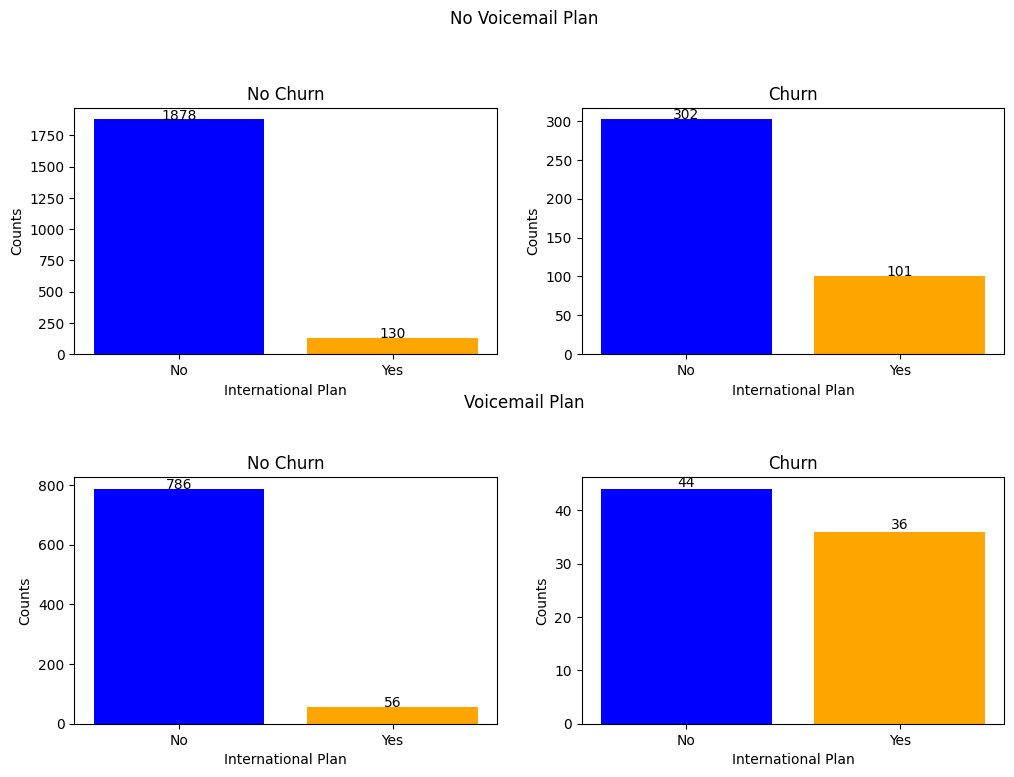

In [ ]:
#df['VMailPlan','IntlPlan','Churn']
count_df=df[df['VMailPlan']=='no'].groupby(['Churn','IntlPlan']).size().unstack()

# Create subplots: 2 row, 2 columns
fig, ax = plt.subplots(2, 2, figsize=(12, 8))

count_df=df[df['VMailPlan']=='no'].groupby(['Churn','IntlPlan']).size().unstack()
# Left Top Panel: Churn = False
labels = ['No', 'Yes']
values = count_df.loc[False].values
ax[0,0].bar(labels, values, color=['blue', 'orange'])
ax[0,0].set_title('No Churn')
ax[0,0].set_xlabel('International Plan')
ax[0,0].set_ylabel('Counts')

# Add text labels on bars in Left Panel
for i, v in enumerate(values):
    ax[0,0].text(i, v + 0.5, str(int(v)), ha='center')

# Right Top Panel: v2 = True
values = count_df.loc[True].values
ax[0,1].bar(labels, values, color=['blue', 'orange'])
ax[0,1].set_title('Churn')
ax[0,1].set_xlabel('International Plan')
ax[0,1].set_ylabel('Counts')

# Add text labels on bars in Right Panel
for i, v in enumerate(values):
    ax[0,1].text(i, v + 0.5, str(int(v)), ha='center')

count_df=df[df['VMailPlan']=='yes'].groupby(['Churn','IntlPlan']).size().unstack()
# Left Top Panel: Churn = False
labels = ['No', 'Yes']
values = count_df.loc[False].values
ax[1,0].bar(labels, values, color=['blue', 'orange'])
ax[1,0].set_title('No Churn')
ax[1,0].set_xlabel('International Plan')
ax[1,0].set_ylabel('Counts')

# Add text labels on bars in Left Panel
for i, v in enumerate(values):
    ax[1,0].text(i, v + 0.5, str(int(v)), ha='center')

# Right Top Panel: v2 = True
values = count_df.loc[True].values
ax[1,1].bar(labels, values, color=['blue', 'orange'])
ax[1,1].set_title('Churn')
ax[1,1].set_xlabel('International Plan')
ax[1,1].set_ylabel('Counts')

# Add text labels on bars in Right Panel
for i, v in enumerate(values):
    ax[1,1].text(i, v + 0.5, str(int(v)), ha='center')

# Add a title above the first row of subplots
fig.text(0.5, 0.98, 'No Voicemail Plan', ha='center', va='bottom', fontsize=12)

# Add a title above the second row of subplots
fig.text(0.5, 0.5, 'Voicemail Plan', ha='center', va='bottom', fontsize=12)
#fig.suptitle('No Voicemail Plan')
fig.subplots_adjust(hspace=0.5)
#plt.tight_layout()
plt.show()

## Exploring numerical variables

In [ ]:
df.drop(['Churn','AreaCode'],axis=1).describe()

,AccountLength,VMailMessage,DayMins,DayCalls,DayCharge,EveMins,EveCalls,EveCharge,NightMins,NightCalls,NightCharge,IntlMins,IntlCalls,IntlCharge,CustServCalls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


**Let's create a scatterplot matrix**

We can see that there are variables that are highly correlated.

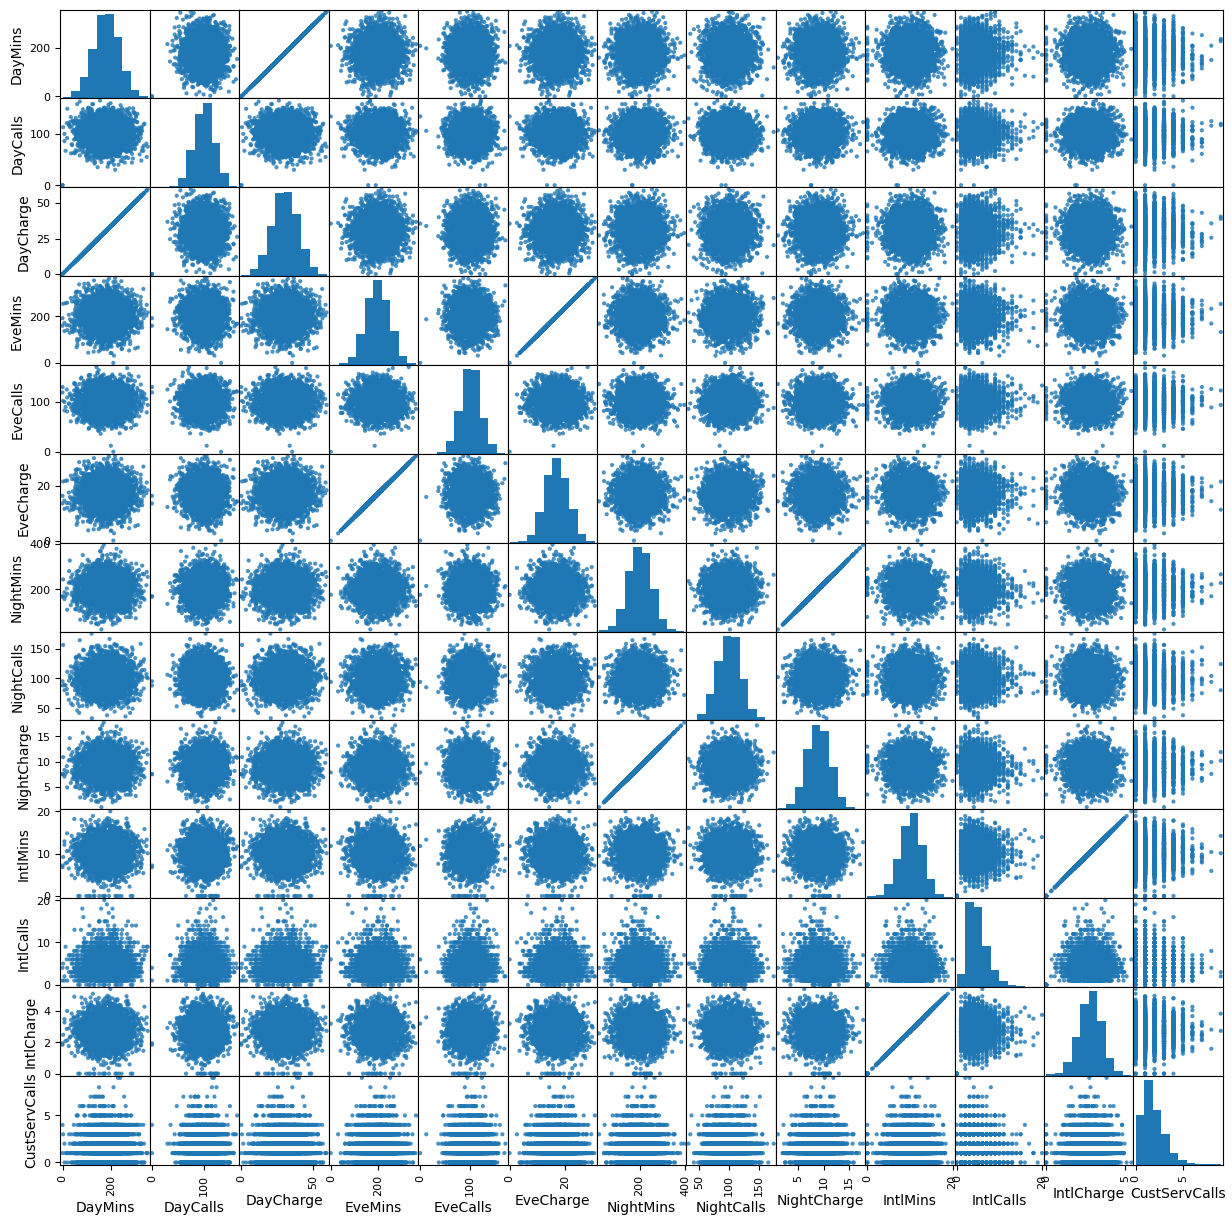

In [ ]:
from pandas.plotting import scatter_matrix
# Create a scatter matrix
#columns = ['AccountLength','VMailMessage','DayMins','DayCalls','DayCharge','EveMins','EveCalls','EveCharge','NightMins','NightCalls','NightCharge','IntlMins','IntlCalls','IntlCharge','CustServCalls']
columns = ['DayMins','DayCalls','DayCharge','EveMins','EveCalls','EveCharge','NightMins','NightCalls','NightCharge','IntlMins','IntlCalls','IntlCharge','CustServCalls']
scatter_matrix(df[columns], alpha=0.8, figsize=(15, 15), diagonal='hist')

plt.show()


**Let's compute correlations**

In [ ]:
df.drop(['Churn','AreaCode'],axis=1).corr(numeric_only=True)

,AccountLength,VMailMessage,DayMins,DayCalls,DayCharge,EveMins,EveCalls,EveCharge,NightMins,NightCalls,NightCharge,IntlMins,IntlCalls,IntlCharge,CustServCalls
AccountLength,1.000000,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796
VMailMessage,-0.004628,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263
DayMins,0.006216,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423
DayCalls,0.038470,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942
DayCharge,0.006214,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427
EveMins,-0.006757,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985
EveCalls,0.019260,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674,0.002423
EveCharge,-0.006745,0.017578,0.007029,-0.021449,0.007036,1.000000,-0.011423,1.000000,-0.012592,0.007596,-0.012601,-0.011043,0.002541,-0.011074,-0.012987
NightMins,-0.008955,0.007681,0.004323,0.022938,0.004324,-0.012584,-0.002093,-0.012592,1.000000,0.011204,0.999999,-0.015207,-0.012353,-0.015180,-0.009288
NightCalls,-0.013176,0.007123,0.022972,-0.019557,0.022972,0.007586,0.007710,0.007596,0.011204,1.000000,0.011188,-0.013605,0.000305,-0.013630,-0.012802


Or even better:

<Axes: >

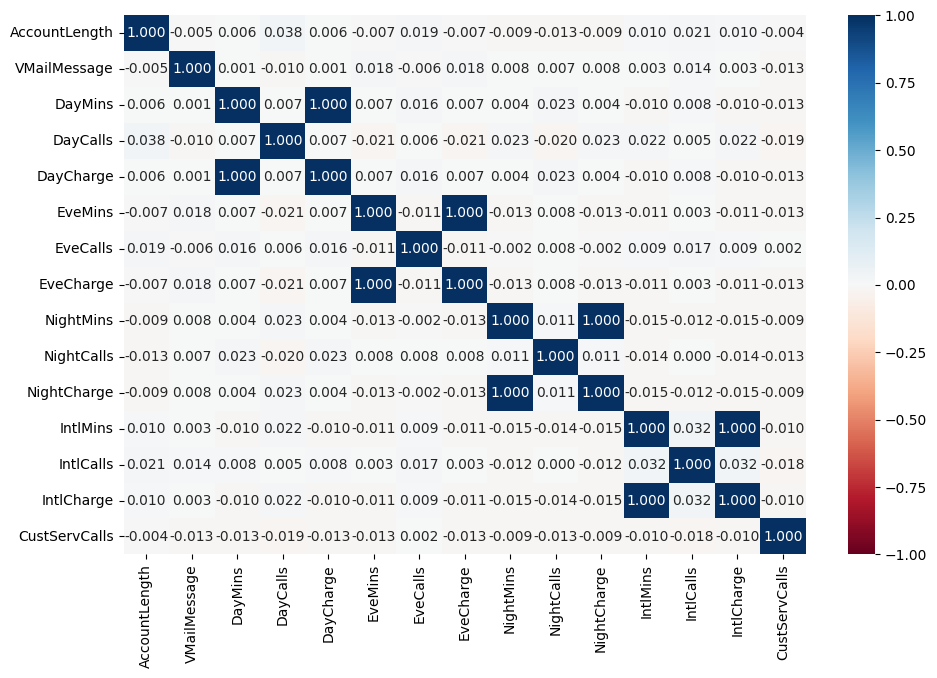

In [ ]:
corr= df.drop(['Churn','AreaCode'],axis=1).corr(numeric_only=True)

# Include information about values (example demonstrates how to control the size of the plot)
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
sns.heatmap(corr, annot=True, fmt=".3f", cmap="RdBu", vmin=-1, vmax=1, center=0, ax=ax)


Let's check number of customer service calls

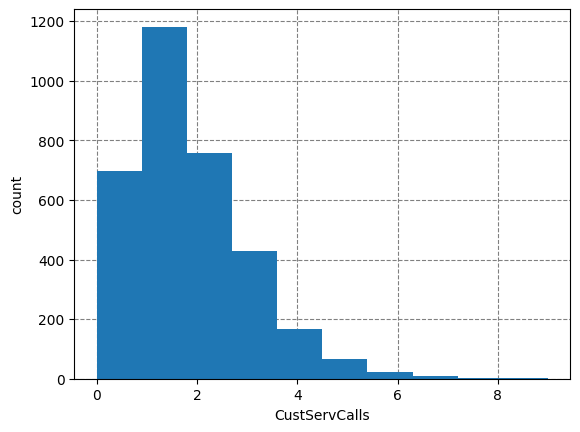

In [ ]:
ax = df['CustServCalls'].hist()
ax.set_xlabel('CustServCalls')
ax.set_ylabel('count')
ax.set_axisbelow(True)  # Show the grid lines behind the histogram
ax.grid(which='major', color='grey', linestyle='--')
plt.show()

Let's stack the histograms overlaid by Churn

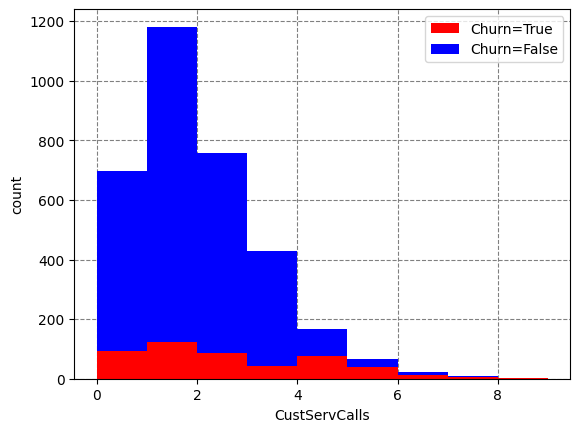

In [ ]:
# Filter the data based on the 'Churn' column
df1 = df.loc[df['Churn'] == True]['CustServCalls']
df2 = df.loc[df['Churn'] == False]['CustServCalls']

# Create a single set of axes for the stacked histograms
fig, ax = plt.subplots()

# Plot the stacked histogram
ax.hist([df1, df2], bins=range(min(df['CustServCalls']), max(df['CustServCalls']) + 1),
        color=['red', 'blue'], stacked=True, label=['Churn=True', 'Churn=False'])

# Label and customize the axes
ax.set_xlabel('CustServCalls')
ax.set_ylabel('count')
ax.set_axisbelow(True)
ax.grid(which='major', color='grey', linestyle='--')

# Add a legend to help distinguish between the two histograms
ax.legend()

# Show the plot
plt.show()

### Boxplots

Let's check if the number of customer service call affects churn

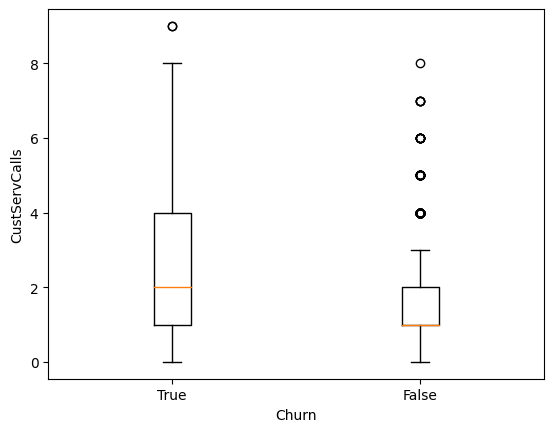

In [ ]:
dataForPlot = [list(df[df['Churn']==True]['CustServCalls']), list(df[df['Churn']==False]['CustServCalls'])]
fig, ax = plt.subplots()
ax.boxplot(dataForPlot)
ax.set_xticks([1, 2])
ax.set_xticklabels([True, False])
ax.set_xlabel('Churn')
ax.set_ylabel('CustServCalls')
plt.show()